In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv


In [2]:
df = pd.read_csv('/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv',encoding='unicode_escape')

In [3]:
(df['Language'].value_counts(normalize=True) * 100).head(10)

Language
English       68.664384
Hindi          5.650685
Spanish        5.308219
French         3.424658
Italian        2.397260
Portuguese     2.054795
Indonesian     1.541096
Japanese       1.027397
Korean         1.027397
German         0.856164
Name: proportion, dtype: float64

In [4]:
df[~ (df['Language'].str.contains("/")) ]['Language'].apply(lambda x: 1 if x == 'English' else 0).value_counts()

Language
1    401
0    160
Name: count, dtype: int64

In [5]:
df['Language'].str.contains("/").value_counts()

Language
False    561
True      23
Name: count, dtype: int64

In [6]:
df[df['Language'].str.contains("/")].groupby('Genre',as_index=False)['Language'].agg({'count'})

,Genre,count
0,Action-adventure,1
1,Black comedy,1
2,Crime drama,1
3,Documentary,17
4,Drama,2
5,War drama,1


In [7]:
df[df['IMDB Score'].isin([df['IMDB Score'].min(),df['IMDB Score'].max()])]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


In [8]:
df['Genre'].value_counts(normalize=True)*100

Genre
Documentary                             27.226027
Drama                                   13.184932
Comedy                                   8.390411
Romantic comedy                          6.678082
Thriller                                 5.650685
                                          ...    
Romantic comedy-drama                    0.171233
Heist film/Thriller                      0.171233
Musical/Western/Fantasy                  0.171233
Horror anthology                         0.171233
Animation/Christmas/Comedy/Adventure     0.171233
Name: proportion, Length: 115, dtype: float64

<Axes: >

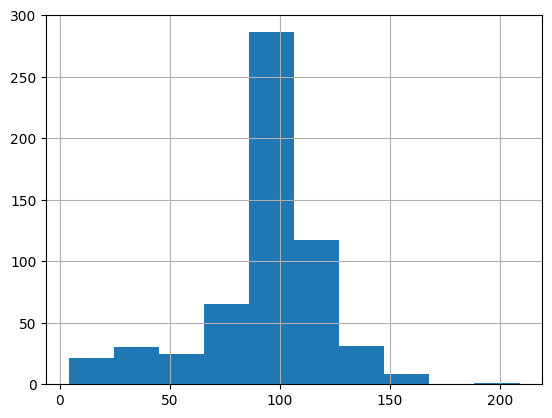

In [9]:
df['Runtime'].hist()

In [10]:
df['Runtime'].describe()['75%'] - df['Runtime'].describe()['25%'] 

22.0

In [11]:
df['Runtime'].describe()['50%']

97.0

In [12]:
df[df['Runtime']==df['Runtime'].max()]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English


In [13]:
df.groupby(['Genre'],as_index=False)['IMDB Score'].agg({'mean':np.mean,'std dev':np.std})

,Genre,mean,std dev
0,Action,5.414286,1.112697
1,Action comedy,5.420000,0.791833
2,Action thriller,6.400000,NaN
3,Action-adventure,7.300000,NaN
4,Action-thriller,6.133333,1.026320
...,...,...,...
110,War,6.750000,0.636396
111,War drama,7.100000,0.848528
112,War-Comedy,6.000000,NaN
113,Western,6.066667,1.250333


In [14]:
df.groupby('Language',as_index=False)['Runtime'].agg({'mean':np.mean,'std dev':np.std})

,Language,mean,std dev
0,Bengali,41.000000,NaN
1,Dutch,99.666667,5.507571
2,English,91.817955,28.506566
3,English/Akan,136.000000,NaN
4,English/Arabic,114.000000,NaN
5,English/Hindi,32.500000,9.192388
6,English/Japanese,89.000000,43.840620
7,English/Korean,121.000000,NaN
8,English/Mandarin,59.000000,28.284271
9,English/Russian,90.000000,NaN


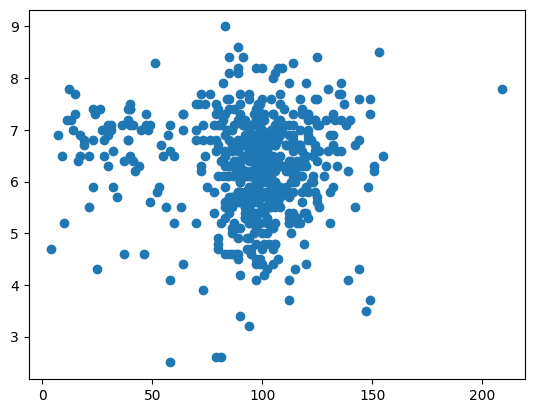

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df['Runtime'],df['IMDB Score'])
plt.show()

In [16]:
df[['Runtime','IMDB Score']].corr()

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000
